# Symbulate Documentation
# Random Variables

A **random variable** is a function that takes as an input an outcome of a probability space and returns a real number.  Commonly encountered random variables are either discrete or continuous.
  * A **discrete** random variable can take at most countably many distinct values.
  * A **continuous** random variable can take any value in some interval of real numbers.

Values of a random variable can be simulated and analyzed much like the outcomes of a probability space.  However, several additional tools are available for random variables.

<a id='contents'></a>

  1. [**Defining a random variable with RV**](#RV)
  1. [**Simulating events**](#RVevent)
  1. [**Visualizing simulation results with `.plot()`**](#plot)
  1. [**Distribution of a random variable**](#distribution)
  1. [**Random variables versus distributions**](#rv_vs_dist) 
  1. [**Functions of a random variable**](#transform)
  1. [**Expected value (mean)**](#mean)
  1. [**Variance**](#var)
  1. [**Standard deviation**](#var)
  1. [**Standardizing simulated values**](#standardize)

< [Simulation tools](sim.html) | [Contents](index.html) | [Common probability models](common.html) >

Be sure to import Symbulate using the following commands.
<a id='rv'></a>

In [1]:
from symbulate import *
%matplotlib inline

<a id='RV'></a>

### Defining a random variable with RV

The `RV` class defines random variables on a probability space.  A random variable is a function which maps each outcome of a probability space to a real number; therefore a probability space must be defined first.

*Example.* Consider the random variable $X$ representing the number of Heads in 5 flips of a fair coin.  With 1 representing Heads and 0 Tails, we can count the number of Heads by summing the 0/1 values.  We define a probability space corresponding to 5 flips of a fair coin, and then a RV on that space which takes an outcome and sums its values.

In [2]:
P = BoxModel([0, 1], size=5)
X = RV(P, sum)

A random variable can be called as a function to return its value for a particular outcome in the probability space.

In [3]:
outcome = (0, 1, 0, 1, 1)
X(outcome)

3

If no function is specified in `RV`, the default is the identity function, `f(x) = x`.

In [4]:
P = Normal(mean=0, sd=1)
X = RV(P)
X(-0.5)

-0.5

Like the probability space defintions, the `RV` command only defines a random variable.  [Simulation tools](sim.html) like `.sim()`, `.tabulate()`, `.filter()`, and `.count()`  work for `RV` just like for `ProbabilitySpace`.

In [5]:
P = BoxModel([0, 1], size=5)
X = RV(P, sum)
values = X.sim(10000)
values

0,4
1,2
2,4
3,4
4,2
5,1
6,1
7,3
8,2
...,...
9999,2


In [6]:
values.tabulate(normalize=True)

0,0.0311
1,0.1557
2,0.3112
3,0.3083
4,0.1606
5,0.0331
Total,1.0


In [7]:
values.count_gt(3) / 10000

0.1937

Random variables can also be specified by user defined functions.

*Example.* Ten cards labeled 1, 2, $\ldots$ , 10 are shuffled and dealt one at a time. Let $X$ be the number of the cards (out of ten) for which the number on the card matches its position in the deal. (For example, a match occurs if card 3 is the third card dealt.)

In [8]:
n = 10
labels = list(range(n))
# remember, Python starts the index at 0, so the cards are labebeled 0, ..., 9

def number_matches(x):
    count = 0
    for i in range(n):
        if x[i] == labels[i]:
            count += 1
    return count


P = BoxModel(labels, size=n, replace=False)
X = RV(P, number_matches)
X.sim(10000)

0,0
1,2
2,0
3,2
4,1
5,1
6,2
7,1
8,0
...,...
9999,2


<a id='RVevent'></a>

### Simulating events

An **event** is a set of outcomes in the probability space.  For example, if the random variable $X$ represents the number of Heads in 5 flips of a fair coin, then the event $\{X>3\}$ is the collection of Heads/Tails sequences with more than 3 Heads.  For syntactical reasons, in Symbulate events must be enclosed in parentheses rather than braces, e.g `(X > 3)`.  Events like `(X > 3)` can be simulated; calling `.sim()` on an event returns `True` for outcomes where the event occurs and `False` otherwise. Simulating events provides another method for estimating probabilities.

*Example.* If $X$ represents the number of Heads in 5 flips of a fair coin, the following is one method for estimating $P(X > 3)$, the probability of more than 3 Heads in 5 flips of a fair coin.  (The true probability is 0.1875.)

In [9]:
P = BoxModel([0, 1], size=5)
X = RV(P, sum)
(X > 3).sim(10000).tabulate()

False,8198
True,1802
Total,10000


<a id='plot'></a>

### Visualizing simulation results with `.plot()`

The `.tabulate()` method provides a tabular summary of the simulated values of an `RV`.  A plot summary can be obtained with `.plot()`.  The type of plot returned depends on the type of the random variable, discrete or continuous.

For *discrete* random variables, `.plot()` generally returns an "impulse" (or "spike") plot of the relative frequencies for each of the realized values.  (Frequencies (counts) can be obtained using the `normalize=False` option.)

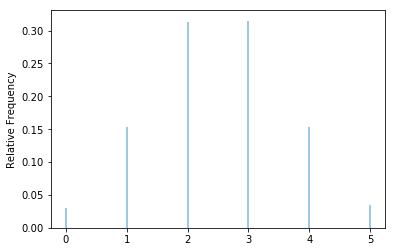

In [10]:
P = BoxModel([0, 1], size=5)
X = RV(P, sum)
X.sim(10000).plot()

For *continuous* random variables, `.plot()` returns a *histogram*, which provides the frequencies of simulated values falling in interval "bins".  By default, the vertical axis of the histogram is on the *density* scale, so that *areas* of the bars correspond to relative frequencies.  (Bin frequencies (counts) can be obtained using the `normalize=False` option.)

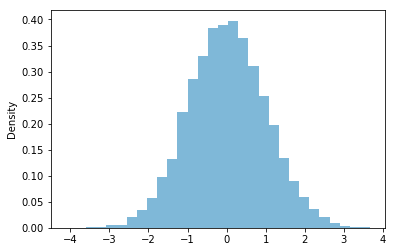

In [11]:
P = Normal(mean=0, sd=1)
X = RV(P)
X.sim(10000).plot()

See the section on [Symbulate graphics](graphics.html) for more details on plotting options and functionality. 

<a id='distribution'></a>

### Distribution of a random variable

The `.tabulate()` and `.plot()` methods provide summaries of the distribution of a random variable.  The **distribution of a random variable** is a probability model on the real line which describes the possible values that the random variable can take and their relative likelihoods.   The distribution of a random variable is determined by (1) the underlying probability space on which the random variable is defined and (2) the function (mapping the probability space outcomes to real numbers) that defines the random variable.  For example, if $X$ represents the number of Heads in 5 flips of a fair coin, we say that $X$ has a `Binomial(n=5, p=0.5)` distribution.

It also common to specify the distribution of a random variable directly.  For example, a problem may  state "let $X$ have a Binomial(5, 0.5) distribution" without mention of the underlying probabilty space or random variable.  `RV` can also be used to define a random variable by specifying its distribution.  (Many [common probability distributions](common.html) are built into Symbulate.)

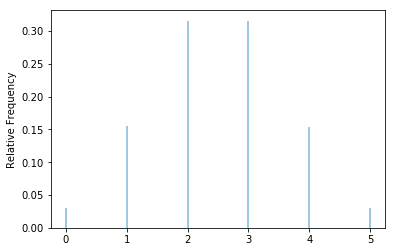

In [12]:
X = RV(Binomial(n=5, p=0.5))
X.sim(10000).plot()

By definition, a random variable must always be a function defined on a probability space.  Specifying a random variable by specifying its distribution, as in `X = RV(Binomial(n=5, p=0.5))`, has the effect of defining the probability space to be the distribution of the random variable and the function defined on this space to be the identity (`f(x) = x`). However, it is more appropriate to think of such a specification as defining a random variable with the given distribution on an *unspecified probability space* through an *unspecified function*.

<a id='rv_vs_dist'></a>

### Random variables versus distributions

Random variables and distributions are two distinct concepts.  For example, the random variables in each of the following situations has a Binomial(5, 0.5) distribution.
- $X$ is the number of Heads in five flips of a fair coin
- $Y$ is the number of Tails in five flips of a fair coin
- $Z$ is the number of even numbers rolled in five rolls of a fair six-sided die
- $W$ is the number of boys in a random sample of five births

Each of these situations involves a different probability space (coins, dice, births) with a random variable which counts according to different criteria (Heads, Tails, evens, boys).  These examples illustrate that knowledge that a random variable has a specific distribution (e.g. Binomial(5, 0.5)) does not necessarily convey any information about the underlying observational units or variable being measured.  This is why we say a specification like `X = RV(Binomial(n=5, p=0.5))` defines a random variable `X` on an *unspecified probability space* via an *unspecified function*.

It is important not to confuse a random variable with its distribution.  For example, suppose that a coin is flipped 5 times and $X$ represents the number of Heads and $Y$ the number of Tails in the 5 flips (so $Y = 5 - X$).  Note that $X$ and $Y$ are two different random variables; they measure different things.  For example, if the outcome of the flips is `(1, 0, 0, 1, 0)` then $X = 2$ but $Y = 3$.  In fact, in this example the values of $X$ and $Y$ are unequal for every outcome in the probability space (that is, $P(X = Y) = 0$).  

In [13]:
P = BoxModel([1, 0], size = 5)
X = RV(P, sum)
Y = 5 - X
(X == Y).sim(10000).tabulate()

False,10000
Total,10000


However, while $X$ and $Y$ are two different random variables, they do have the same distribution over many outcomes.

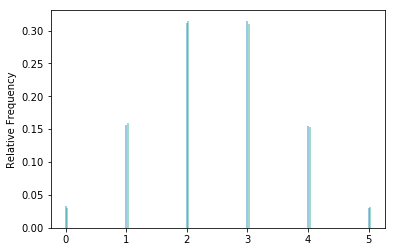

In [14]:
X.sim(10000).plot()
Y.sim(10000).plot(jitter = True)

<a id='transform'></a>

### Functions of a random variable

A transformation of a random variable is also a random variable.  If $X$ is a random variable and $g$ is function, define a new random variable $Y=g(X)$ in Symbulate using the `.apply()` method, e.g. `Y = X.apply(g)`.  An `RV` defined via a transformation of another `RV` behaves like any Symbulate `RV`.

Note that for arithmetic operations and many math functions (such as `exp`, `log`, `sin`) you can simply call `g(X)` rather than `X.apply(g)`.  User-defined functions can also be used to define or transform random variables.

*Example.* If $X$ has a normal distribution, then $e^X$ has a *lognormal* distribution.

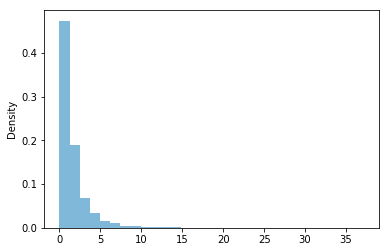

In [15]:
X = RV(Normal(mean=0, var=1))
Y = exp(X) # same as X.apply(exp)
Y.sim(10000).plot()

*Example.* If $U$ has a Uniform(0,1) distribution then $-\log(1-U)$ has an Exponential(1) distribution.

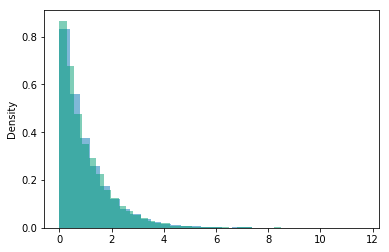

In [16]:
U = RV(Uniform(a=0, b=1))
X = -log(1 - U)
X.sim(10000).plot(alpha=0.5)
RV(Exponential(1)).sim(10000).plot(alpha=0.5)

*Example.* A user defined function with `.apply()`

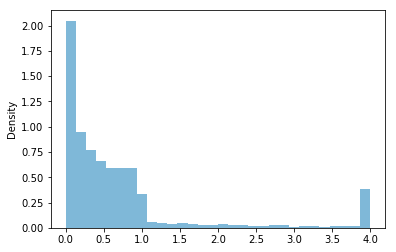

In [17]:
def g(x):
    return min(abs(x - 1), 2)**2

X = RV(Exponential(rate = 1))
Y = X.apply(g)
Y.sim(10000).plot()

<a id='mean'></a>

### Expected value (mean)

The **expected value** of a random variable, $E(X)$, is its probability-weighted average value. 

The expected value of a discrete random variable $X$ with probability mass function $p_X(x) = P(X=x)$ is
$$
E(X) = \sum_{x} x \, p_X(x)
$$
The expected value $E(X)$ of a continuous random variable $X$ with probability density function $f_X$ is
$$
E(X) = \int\limits_{-\infty}\limits^{+\infty} x \, f_{X}(x)\, dx
$$
An expected value can be approximated by simulating many values of the random variable and finding their sample mean (i.e. average) using `.mean()`.

*Example*.  If $X$ has a geometric distribution with $p = 0.1$ its expected value is $1/0.1 = 10$.

In [18]:
RV(Geometric(p=0.1)).sim(10000).mean()

9.8257999999999992

If x denotes simulated values, then either `x.mean()` or `mean(x)` will return the mean of the values.

In [19]:
x = RV(Geometric(p=0.1)).sim(10000)
mean(x)

10.0683

Recall that output can be formatted using [print statements](index.html#displayoutput).

In [20]:
print('An estimate of E(X) is: {:.2f}'.format(mean(x)))

An estimate of E(X) is: 10.07


<a id='var'></a>

### Variance

The variance of a random variable is the probability-weighted average of the squared deviation from the expected value:
$$
Var(X) = E\left[\left( X-E(X)\right) ^2\right].
$$
Similar to expected value, variance can be approximated by simulating many values of the random variable and finding their sample variance, using `.var()`.  (As with mean, both `x.var()` or `var(x)` are allowed.)

*Example.* If $X$ has an exponential distribution with rate parameter $\lambda=1/4$ its variance is 16.

In [21]:
X = RV(Exponential(rate=1/4))
x = X.sim(10000)
x.var()

16.173018326146988

Using `.var()` is equivalent to the following.

In [22]:
mean((x - x.mean()) ** 2)

16.173018326146991

**Standard deviation**, `.sd()`, is the square root of the variance.  (As with mean, both `x.sd()` or `sd(x)` are allowed.)

In [23]:
x.sd()

4.0215691373078482

In [24]:
sqrt(x.var())

4.021569137307848

<a id='standardize'></a>
### Standardizing simulated values

A **standardized variable** is a variable that has been rescaled to have a mean of zero and a standard deviation of one.  Standardization is achieved by subtracting the mean from each value and then dividing by the standard deviation.  In Symbulate, the `.standardize()` method standardizes the simulated values of a random variable.

In [25]:
X = RV(Normal(mean=3, sd=2))
x = X.sim(10000)
x.mean(), x.sd()

(3.0171786975184514, 1.9834655163959787)

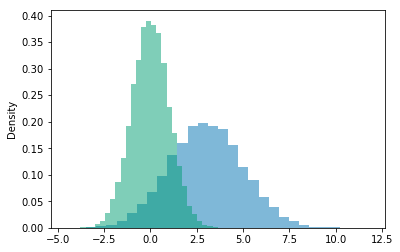

In [26]:
z = x.standardize()
x.plot()
z.plot()

In [27]:
z.mean(), z.sd()

(2.4833468614815503e-16, 1.0)

< [Simulation tools](sim.html) | [Contents](index.html) | [Common probability models](common.html) >